In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
# load data 
meters = pd.read_csv("C:\\Users\\Oluwajuwon\\Documents\\Smart Systems\\Projects\\Data Science Projects\\project_notebooks\\cleaned_energy_data.csv")

In [3]:
meters['timestamp'] = pd.to_datetime(meters['timestamp'])

In [4]:
a =meters[meters.meter_id == 'AED201'].set_index('timestamp')

In [5]:
a.drop('color_code',axis=1,inplace = True)

In [6]:
a.index

DatetimeIndex(['2022-10-17 08:49:15+01:00', '2022-10-17 08:50:09+01:00',
               '2022-10-17 08:51:03+01:00', '2022-10-17 08:51:57+01:00',
               '2022-10-29 14:52:26+01:00', '2022-10-29 14:54:14+01:00',
               '2022-10-29 14:55:08+01:00', '2022-10-29 14:56:02+01:00',
               '2022-10-29 14:56:56+01:00', '2022-10-29 14:57:50+01:00',
               ...
               '2023-03-10 01:52:03+01:00', '2023-03-10 01:52:57+01:00',
               '2023-03-10 01:53:51+01:00', '2023-03-10 01:54:45+01:00',
               '2023-03-10 01:55:39+01:00', '2023-03-10 01:56:33+01:00',
               '2023-03-10 01:57:27+01:00', '2023-03-10 01:58:21+01:00',
               '2023-03-10 01:59:16+01:00', '2023-03-10 02:00:10+01:00'],
              dtype='datetime64[ns, pytz.FixedOffset(60)]', name='timestamp', length=38662, freq=None)

In [7]:
a.loc['2022-10']

,meter_id,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
timestamp,,,,,,,,,
2022-10-17 08:49:15+01:00,AED201,0.33,221.96,50.06,0.00,0.0201,0.00,73.25,73.25
2022-10-17 08:50:09+01:00,AED201,0.42,221.04,50.11,0.66,0.0206,61.56,70.08,93.28
2022-10-17 08:51:03+01:00,AED201,0.39,221.00,50.10,0.72,0.0214,61.74,59.51,85.75
2022-10-17 08:51:57+01:00,AED201,0.37,220.88,50.14,0.75,0.0222,61.63,54.35,82.17
2022-10-29 14:52:26+01:00,AED201,0.23,213.38,50.24,0.92,0.0237,45.94,19.56,49.93
...,...,...,...,...,...,...,...,...,...
2022-10-31 23:55:12+01:00,AED201,0.16,218.94,50.18,0.90,0.6685,31.92,15.47,35.47
2022-10-31 23:56:06+01:00,AED201,0.17,219.12,50.17,0.88,0.6689,32.39,17.49,36.81
2022-10-31 23:57:00+01:00,AED201,0.16,219.02,50.15,0.90,0.6694,31.54,15.27,35.04


In [8]:
a.groupby(a.index.date).first()

,meter_id,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
2022-10-17,AED201,0.33,221.96,50.06,0.00,0.0201,0.00,73.25,73.25
2022-10-29,AED201,0.23,213.38,50.24,0.92,0.0237,45.94,19.56,49.93
2022-10-30,AED201,0.28,216.10,50.21,0.96,0.1161,57.26,16.68,59.64
2022-10-31,AED201,0.22,220.42,50.16,0.86,0.5320,40.95,24.29,47.61
2022-11-01,AED201,0.16,218.80,50.10,0.90,0.6713,31.90,15.46,35.45
...,...,...,...,...,...,...,...,...,...
2023-03-06,AED201,0.17,225.82,50.18,0.16,1.1244,6.29,38.78,39.29
2023-03-07,AED201,0.22,234.52,50.24,0.72,1.1285,36.81,35.49,51.13
2023-03-08,AED201,0.17,226.18,50.32,0.36,1.1553,13.84,35.87,38.45
2023-03-09,AED201,0.23,229.36,50.18,0.62,1.1691,32.71,41.38,52.75


<Axes: >

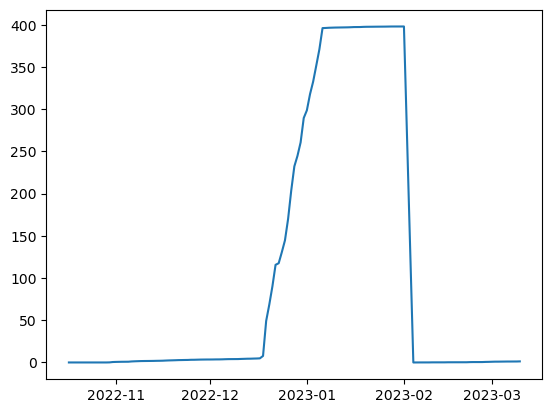

In [9]:
a.groupby(a.index.date).first()['energy'].plot()

In [31]:
af = a.loc['2022-10-17']

In [35]:
af.reset_index()

,timestamp,meter_id,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
0,2022-10-17 08:49:15+01:00,AED201,0.33,221.96,50.06,0.00,0.0201,0.00,73.25,73.25
1,2022-10-17 08:50:09+01:00,AED201,0.42,221.04,50.11,0.66,0.0206,61.56,70.08,93.28
2,2022-10-17 08:51:03+01:00,AED201,0.39,221.00,50.10,0.72,0.0214,61.74,59.51,85.75
3,2022-10-17 08:51:57+01:00,AED201,0.37,220.88,50.14,0.75,0.0222,61.63,54.35,82.17


In [7]:
on23.rename(columns={'w_timestamp':'timestamp'})

,Unnamed: 0,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,tita,hour,time_diff
0,0,OND023,2022-07-12 13:57:30.449294+00:00,0.79,210.1,50.1,0.75,NaN,0.124484,0.109785,0.165979,41.409622,14,0.009675
1,1,OND023,2022-07-12 13:58:42.793010+00:00,0.80,210.6,50.0,0.75,0.002539,0.126360,0.111439,0.168480,41.409622,14,0.009675
2,2,OND023,2022-07-12 14:00:28.080361+00:00,0.85,208.3,50.0,0.74,0.003832,0.131021,0.119088,0.177055,42.268584,15,0.009675
3,3,OND023,2022-07-12 14:01:00.914557+00:00,0.74,208.5,50.0,0.76,0.001069,0.117260,0.100277,0.154290,40.535802,15,0.009675
4,4,OND023,2022-07-12 14:01:34.931821+00:00,0.74,208.1,49.9,0.76,0.001106,0.117035,0.100084,0.153994,40.535802,15,0.009675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161079,161079,OND023,2022-10-22 21:35:34.272836+00:00,1.92,229.1,49.9,0.90,0.003651,0.395885,0.191736,0.439872,25.841933,22,0.009675
161080,161080,OND023,2022-10-22 21:36:08.484019+00:00,1.63,229.1,49.9,0.93,0.003300,0.347293,0.137259,0.373433,21.565185,22,0.009675
161081,161081,OND023,2022-10-22 21:36:43.545834+00:00,1.62,229.5,50.0,0.93,0.003368,0.345765,0.136655,0.371790,21.565185,22,0.009675
161082,161082,OND023,2022-10-22 21:38:28.735422+00:00,1.50,230.9,50.1,0.75,0.007590,0.259763,0.229089,0.346350,41.409622,22,0.009675


In [8]:
def clean(df):
    df = df.dropna()
    df = df.iloc[:,[2,7]]
    df['w_timestamp'] = pd.to_datetime(df['w_timestamp'])
    df = df.rename(columns = {'w_timestamp':'timestamp'})
    return df

In [9]:
on23_energy = clean(on23)

In [10]:
on23_energy

,timestamp,energy
1,2022-07-12 13:58:42.793010+00:00,0.002539
2,2022-07-12 14:00:28.080361+00:00,0.003832
3,2022-07-12 14:01:00.914557+00:00,0.001069
4,2022-07-12 14:01:34.931821+00:00,0.001106
5,2022-07-12 14:02:10.738666+00:00,0.001164
...,...,...
161079,2022-10-22 21:35:34.272836+00:00,0.003651
161080,2022-10-22 21:36:08.484019+00:00,0.003300
161081,2022-10-22 21:36:43.545834+00:00,0.003368
161082,2022-10-22 21:38:28.735422+00:00,0.007590


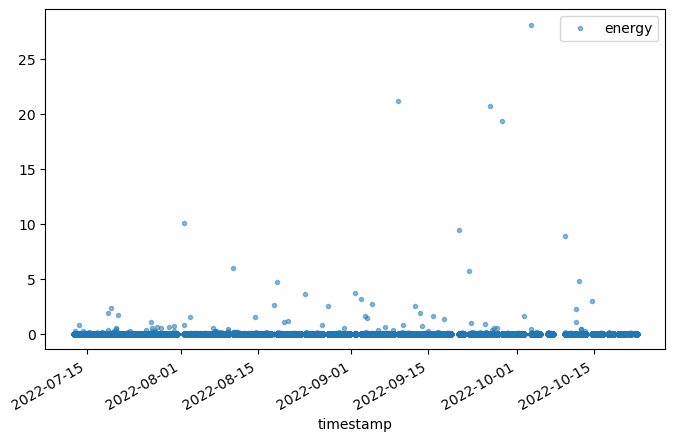

In [11]:
on23_energy.set_index('timestamp').plot(style='.',figsize=(8,5), alpha=0.5);

In [12]:
# check the indices of the outliers
on23_energy[on23_energy['energy'] >= 5].index

Int64Index([39276, 57111, 106223, 123474, 125489, 131583, 133562, 140491,
            145842],
           dtype='int64')

**Comparing the outliers to their surrounding values**

In [13]:
on23_energy[39276-5:39276+5]

,timestamp,energy
39272,2022-07-31 08:16:14.175370+00:00,0.003312
39273,2022-07-31 08:16:50.253476+00:00,0.003649
39274,2022-07-31 08:17:24.302489+00:00,0.003441
39275,2022-07-31 08:18:00.425344+00:00,0.003666
39276,2022-08-01 14:23:55.344421+00:00,10.109917
39277,2022-08-01 14:24:30.125847+00:00,0.002527
39278,2022-08-01 14:25:06.173362+00:00,0.002508
39279,2022-08-01 14:25:40.297840+00:00,0.002311
39280,2022-08-01 14:27:25.166536+00:00,0.007101
39281,2022-08-01 14:28:03.112692+00:00,0.002567


In [14]:
on23_energy[106223-5:106223+5]

,timestamp,energy
106219,2022-09-08 16:21:32.259691+00:00,0.003329
106220,2022-09-08 16:22:07.266646+00:00,0.003351
106221,2022-09-08 16:22:42.315388+00:00,0.003373
106222,2022-09-08 16:23:52.400511+00:00,0.006693
106223,2022-09-09 13:14:49.295144+00:00,21.180010
106224,2022-09-09 13:15:58.177206+00:00,0.018553
106225,2022-09-09 13:16:34.283924+00:00,0.009486
106226,2022-09-09 13:17:08.289692+00:00,0.008772
106227,2022-09-09 13:17:43.330812+00:00,0.008986
106228,2022-09-09 13:18:53.381561+00:00,0.017586


In [15]:
on23_energy[131583-5:131583+5]

,timestamp,energy
131579,2022-09-25 13:47:38.345544+00:00,0.001933
131580,2022-09-25 13:48:13.518639+00:00,0.000960
131581,2022-09-25 13:48:48.687467+00:00,0.000974
131582,2022-09-25 13:49:23.481290+00:00,0.000950
131583,2022-09-26 05:37:38.091642+00:00,20.664537
131584,2022-09-26 05:38:12.948940+00:00,0.011382
131585,2022-09-26 05:38:49.315579+00:00,0.011214
131586,2022-09-26 05:39:23.125468+00:00,0.010124
131587,2022-09-26 05:39:57.031914+00:00,0.010202
131588,2022-09-26 05:40:33.133455+00:00,0.010875


In [16]:
on23_energy[133562-5:133562+5]

,timestamp,energy
133558,2022-09-27 13:57:45.411574+00:00,0.000512
133559,2022-09-27 13:58:20.580844+00:00,0.000513
133560,2022-09-27 13:59:34.756135+00:00,0.001080
133561,2022-09-27 14:00:05.048451+00:00,0.000441
133562,2022-09-28 09:46:35.554955+00:00,19.310304
133563,2022-09-28 09:47:10.585309+00:00,0.009370
133564,2022-09-28 09:47:45.518078+00:00,0.009103
133565,2022-09-28 09:49:34.407519+00:00,0.027301
133566,2022-09-28 09:50:05.872354+00:00,0.007816
133567,2022-09-28 09:51:16.144718+00:00,0.000107


In [17]:
on23_energy[140491-5:140491+5]

,timestamp,energy
140487,2022-10-02 10:16:48.594891+00:00,0.001087
140488,2022-10-02 10:17:23.657131+00:00,0.001089
140489,2022-10-02 10:17:58.673387+00:00,0.001088
140490,2022-10-02 10:18:33.735410+00:00,0.001089
140491,2022-10-03 13:02:47.038115+00:00,28.091988
140492,2022-10-03 13:03:22.035745+00:00,0.009921
140493,2022-10-03 13:03:57.010643+00:00,0.009696
140494,2022-10-03 13:04:32.014965+00:00,0.003351
140495,2022-10-03 13:05:07.057976+00:00,0.011606
140496,2022-10-03 13:05:42.195958+00:00,0.025327


In [18]:
on23_energy[57111-5:57111+5]

,timestamp,energy
57107,2022-08-09 18:04:20.767627+00:00,0.000537
57108,2022-08-09 18:04:55.764934+00:00,0.000543
57109,2022-08-09 18:05:31.821920+00:00,0.000559
57110,2022-08-09 18:06:05.743155+00:00,0.000525
57111,2022-08-10 12:35:49.102419+00:00,5.960742
57112,2022-08-10 12:36:23.549294+00:00,0.002918
57113,2022-08-10 12:36:58.551202+00:00,0.002865
57114,2022-08-10 12:37:33.581390+00:00,0.002865
57115,2022-08-10 12:38:12.155707+00:00,0.003380
57116,2022-08-10 12:38:44.797544+00:00,0.002827


In [19]:
on23_energy[123474-5:123474+5]

,timestamp,energy
123470,2022-09-19 01:53:33.013078+00:00,0.000008
123471,2022-09-19 01:54:08.040094+00:00,0.000008
123472,2022-09-19 01:54:43.153991+00:00,0.000008
123473,2022-09-19 01:55:19.146815+00:00,0.000008
123474,2022-09-20 13:53:23.180365+00:00,9.412459
123475,2022-09-20 13:53:57.524969+00:00,0.002256
123476,2022-09-20 13:54:32.339033+00:00,0.001931
123477,2022-09-20 13:55:07.080216+00:00,0.001908
123478,2022-09-20 13:55:43.525813+00:00,0.001992
123479,2022-09-20 13:56:17.570798+00:00,0.001887


In [20]:
on23_energy[125489-5:125489+5]

,timestamp,energy
125485,2022-09-21 11:34:30.215860+00:00,0.001895
125486,2022-09-21 11:35:06.280692+00:00,0.001785
125487,2022-09-21 11:35:40.100509+00:00,0.001634
125488,2022-09-21 11:36:15.494309+00:00,0.001736
125489,2022-09-22 10:36:19.250793+00:00,5.696538
125490,2022-09-22 10:36:51.534421+00:00,0.001721
125491,2022-09-22 10:37:26.472409+00:00,0.001683
125492,2022-09-22 10:38:01.961973+00:00,0.001688
125493,2022-09-22 10:38:40.115849+00:00,0.001811
125494,2022-09-22 10:39:11.787150+00:00,0.001500


In [21]:
on23_energy[145842-5:145842+5]

,timestamp,energy
145838,2022-10-07 13:18:26.178373+00:00,0.000660
145839,2022-10-07 13:19:00.023183+00:00,0.000616
145840,2022-10-07 13:19:35.062935+00:00,0.000638
145841,2022-10-07 13:20:10.108377+00:00,0.000637
145842,2022-10-09 18:31:50.668615+00:00,8.871263
145843,2022-10-09 18:33:00.368742+00:00,0.013289
145844,2022-10-09 18:33:35.357981+00:00,0.006248
145845,2022-10-09 18:34:10.354757+00:00,0.001874
145846,2022-10-09 18:35:20.397453+00:00,0.003751
145847,2022-10-09 18:35:58.371624+00:00,0.002041


**They all occured on the first observation of their days**

In [22]:
# group by to check the first occurence of each days
first = on23_energy.groupby(on23_energy.timestamp.dt.date).first()

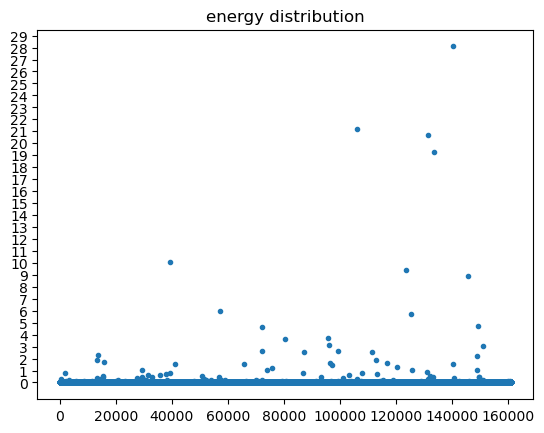

In [23]:
on23_energy['energy'].plot(style='.')
plt.title('energy distribution')
plt.yticks(np.arange(0,30));

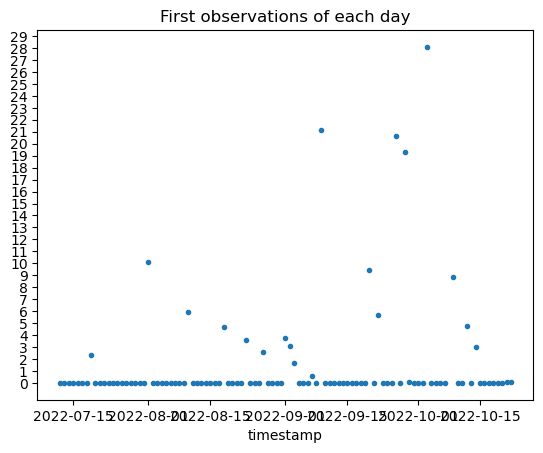

In [24]:
first['energy'].plot(style='.')
plt.title('First observations of each day')
plt.yticks(np.arange(0,30));

**Verify whether the high observations really occurred on first observations**

In [25]:
len(first[first['energy'] >= 2]) == len(on23_energy[on23_energy['energy'] >= 2])

False

In [26]:
len(first[first['energy'] >= 1]) == len(on23_energy[on23_energy['energy'] >= 1])

False

In [27]:
len(first[first['energy'] >= 3]) == len(on23_energy[on23_energy['energy'] >= 3])

True

In [28]:
first[first['energy'] >= 3].reset_index(drop=True).timestamp == \
on23_energy[on23_energy['energy'] >= 3].reset_index(drop=True).timestamp

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
Name: timestamp, dtype: bool

**High energy consumption happened on the first occurence of some days.the first reading of the meter was unusually high on these days. These high values are greater or equal to 3**

In [29]:
# drop energies greater or equal to 3
ids = on23_energy[on23_energy['energy'] >= 3].index

on23_energy_cleaned = on23_energy.drop(index=ids)

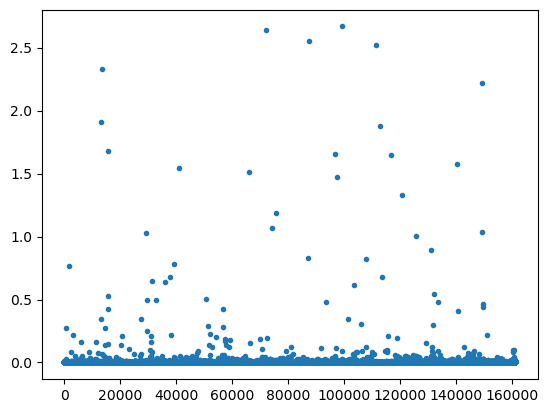

In [30]:
on23_energy_cleaned['energy'].plot(style='.');

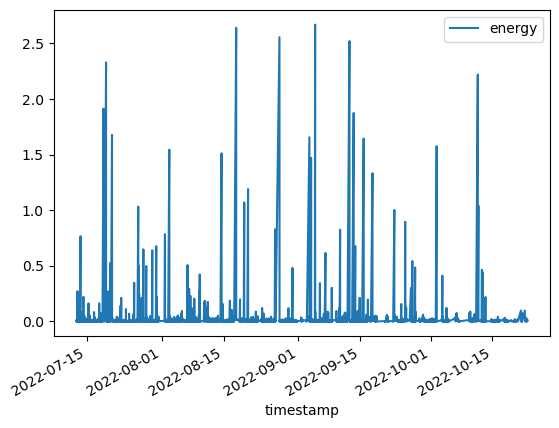

In [31]:
on23_energy_cleaned.set_index('timestamp').plot();

In [32]:
np.random.randint(0,2,12)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [33]:
on23_energy_cleaned

,timestamp,energy
1,2022-07-12 13:58:42.793010+00:00,0.002539
2,2022-07-12 14:00:28.080361+00:00,0.003832
3,2022-07-12 14:01:00.914557+00:00,0.001069
4,2022-07-12 14:01:34.931821+00:00,0.001106
5,2022-07-12 14:02:10.738666+00:00,0.001164
...,...,...
161079,2022-10-22 21:35:34.272836+00:00,0.003651
161080,2022-10-22 21:36:08.484019+00:00,0.003300
161081,2022-10-22 21:36:43.545834+00:00,0.003368
161082,2022-10-22 21:38:28.735422+00:00,0.007590


**Prepare data for modelling**

In [34]:
def extract_values(df):
    df['year'] = df['timestamp'].dt.year
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.isocalendar().day
    df['week'] = df['timestamp'].dt.isocalendar().week
    df['hour'] = df['timestamp'].dt.hour
    df['minute'] = df['timestamp'].dt.minute
    df['second'] = df['timestamp'].dt.second
    df['microsecond'] = df['timestamp'].dt.microsecond
    df = df.drop(columns= ['timestamp'])
    return df

In [35]:
clean_data = extract_values(on23_energy_cleaned)

In [36]:
clean_data.columns[2:]

Index(['month', 'day', 'week', 'hour', 'minute', 'second', 'microsecond'], dtype='object')

In [39]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10)

In [40]:
from sklearn.svm import SVR

svr_model = SVR()

**SVR with Scaling**

In [41]:

x_columns = clean_data.columns[2:]
train_rmse1 = []
test_rmse1 = []

train_mae1 = []
test_mae1 = []

train_mape1 = []
test_mape1 = []

for train_index, test_index in tscv.split(clean_data):
    train = clean_data.iloc[train_index]
    test = clean_data.iloc[test_index]

    x_train = train[x_columns]
    y_train = train['energy']

    x_test = test[x_columns]
    y_test = test['energy']

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)

    svr_model.fit(x_train,y_train)

    train_pred1 = svr_model.predict(x_train)
    test_pred1 = svr_model.predict(x_test)

    #scores 

    train_rmse1.append(np.sqrt(mean_squared_error(y_train,train_pred1)))
    test_rmse1.append(np.sqrt(mean_squared_error(y_test,test_pred1)))

    train_mae1.append(np.sqrt(mean_absolute_error(y_train,train_pred1)))
    test_mae1.append(np.sqrt(mean_absolute_error(y_test,test_pred1)))

    train_mape1.append(np.sqrt(mean_absolute_percentage_error(y_train,train_pred1)))
    test_mape1.append(np.sqrt(mean_absolute_percentage_error(y_test,test_pred1)))



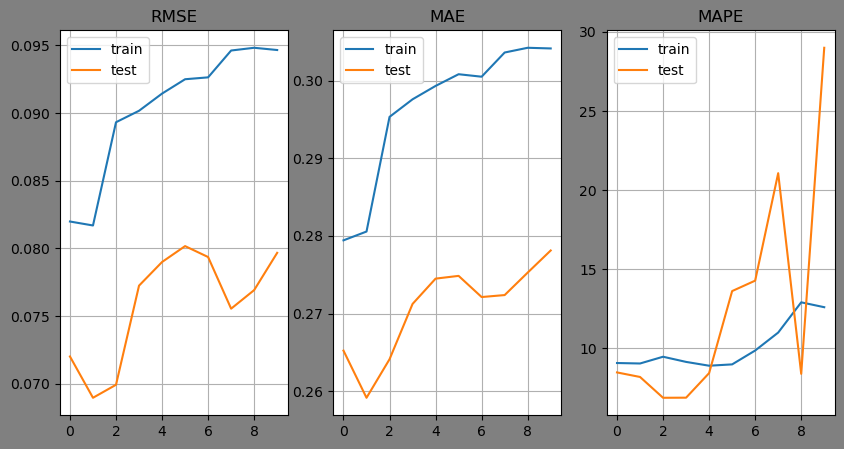

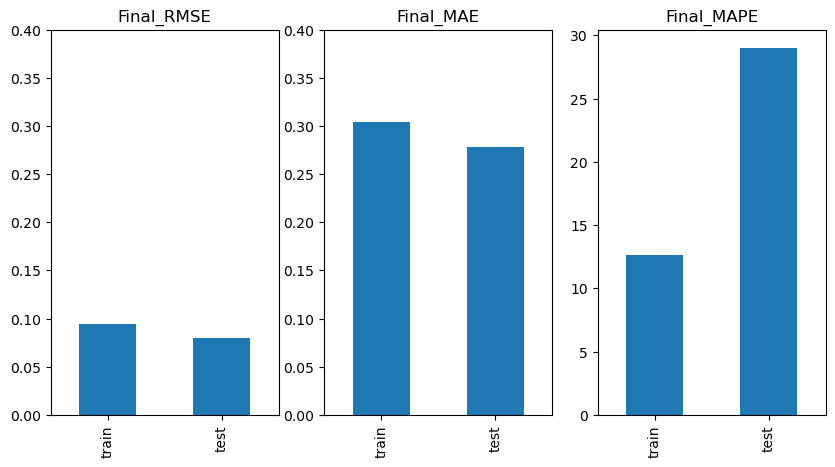

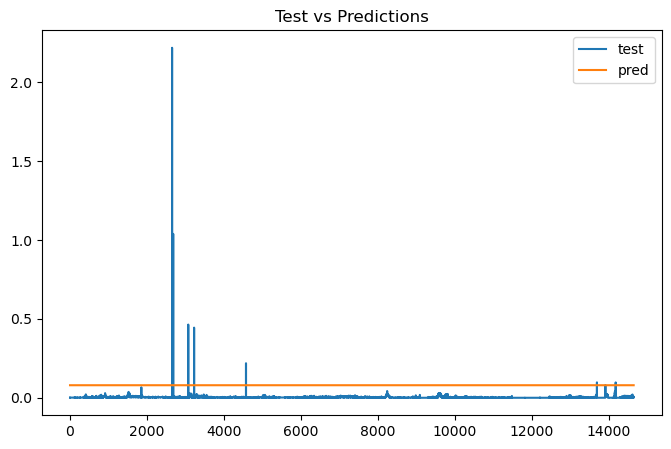

In [141]:

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=[10,5])
fig.set_facecolor('grey')
plt.title('SVR Scaled')
ax1.plot(train_rmse1, label = 'train')
ax1.plot(test_rmse1, label = 'test')
ax1.set_title('RMSE')
ax1.grid()
ax1.legend()
ax2.plot(train_mae1, label = 'train')
ax2.plot(test_mae1, label = 'test')
ax2.set_title('MAE')
ax2.grid()
ax2.legend()
ax3.plot(train_mape1, label = 'train')
ax3.plot(test_mape1, label = 'test')
ax3.set_title('MAPE')
ax3.legend()
plt.grid()


plt.figure(figsize = [10,5])
plt.subplot(1,3,1)
plt.ylim(0,0.4)

pd.Series([train_rmse1[-1],test_rmse1[-1]],index=['train','test']).plot(kind='bar')
plt.title('Final_RMSE')
plt.ylim(0,0.4)

plt.subplot(1,3,2)
pd.Series([train_mae1[-1],test_mae1[-1]],index=['train','test']).plot(kind='bar')
plt.title('Final_MAE')
plt.ylim(0,0.4)

plt.subplot(1,3,3)
pd.Series([train_mape1[-1],test_mape1[-1]],index=['train','test']).plot(kind='bar')
plt.title('Final_MAPE')

plt.figure(figsize=[8,5])
plt.plot(np.array(y_test), label='test')
plt.plot(test_pred1, label='pred')
plt.title('Test vs Predictions')
plt.legend();

**SVR without scaling**

In [43]:
x_columns = clean_data.columns[2:]
train_rmse2 = []
test_rmse2 = []

train_mae2 = []
test_mae2 = []

train_mape2 = []
test_mape2 = []

for train_index, test_index in tscv.split(clean_data):
    train = clean_data.iloc[train_index]
    test = clean_data.iloc[test_index]

    x_train = train[x_columns]
    y_train = train['energy']

    x_test = test[x_columns]
    y_test = test['energy']


    svr_model.fit(x_train,y_train)

    train_pred2 = svr_model.predict(x_train)
    test_pred2 = svr_model.predict(x_test)

    #scores 

    train_rmse2.append(np.sqrt(mean_squared_error(y_train,train_pred2)))
    test_rmse2.append(np.sqrt(mean_squared_error(y_test,test_pred2)))

    train_mae2.append(np.sqrt(mean_absolute_error(y_train,train_pred2)))
    test_mae2.append(np.sqrt(mean_absolute_error(y_test,test_pred2)))

    train_mape2.append(np.sqrt(mean_absolute_percentage_error(y_train,train_pred2)))
    test_mape2.append(np.sqrt(mean_absolute_percentage_error(y_test,test_pred2)))

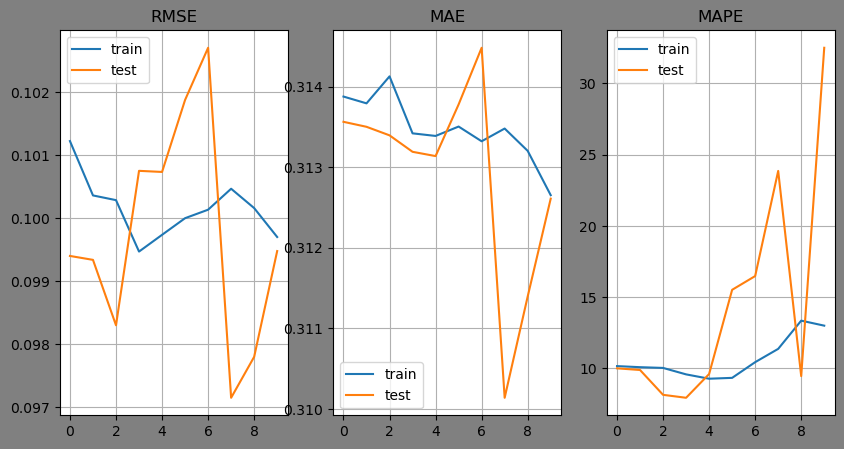

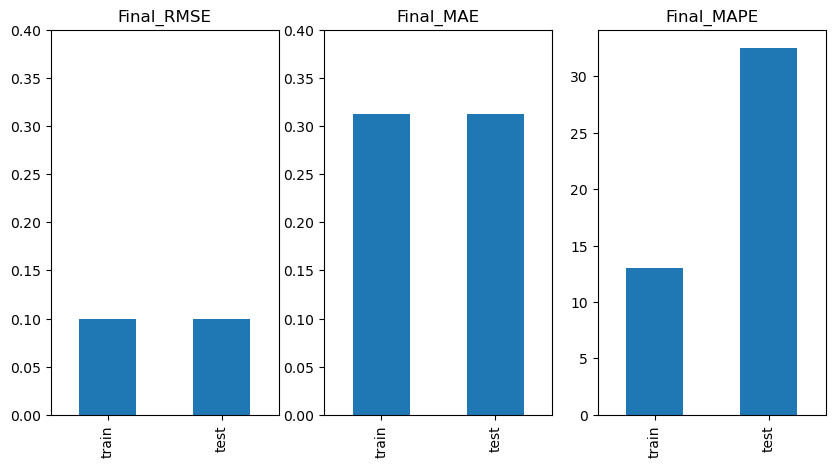

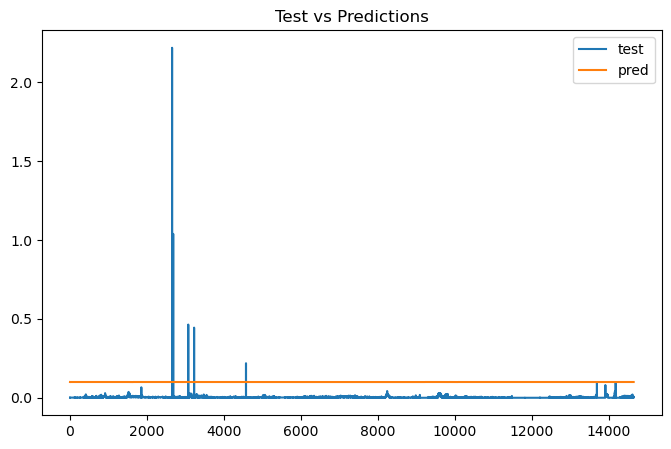

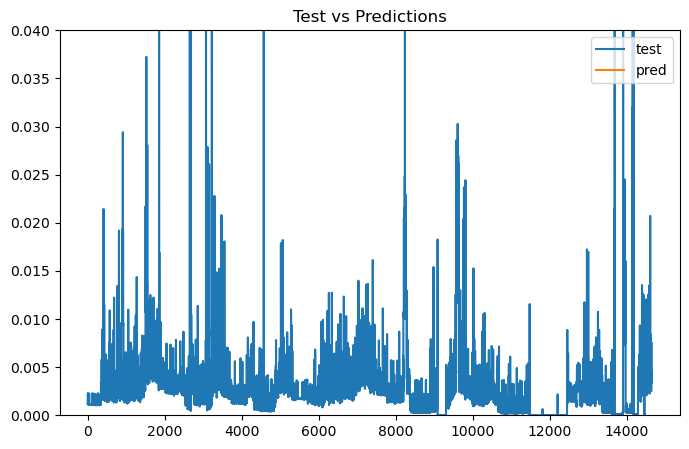

In [140]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=[10,5])
fig.set_facecolor('grey')
ax1.plot(train_rmse2, label = 'train')
ax1.plot(test_rmse2, label = 'test')
ax1.set_title('RMSE')
ax1.grid()
ax1.legend()
ax2.plot(train_mae2, label = 'train')
ax2.plot(test_mae2, label = 'test')
ax2.set_title('MAE')
ax2.grid()
ax2.legend()
ax3.plot(train_mape2, label = 'train')
ax3.plot(test_mape2, label = 'test')
ax3.set_title('MAPE')
ax3.legend()
plt.grid();

# plot the average RMSEs
plt.figure(figsize = [10,5])

plt.subplot(1,3,1)
pd.Series([train_rmse2[-1],test_rmse2[-1]],index=['train','test']).plot(kind='bar')
plt.title('Final_RMSE')
plt.ylim(0,0.4)

plt.subplot(1,3,2)
pd.Series([train_mae2[-1],test_mae2[-1]],index=['train','test']).plot(kind='bar')
plt.title('Final_MAE')
plt.ylim(0,0.4)

plt.subplot(1,3,3)
pd.Series([train_mape2[-1],test_mape2[-1]],index=['train','test']).plot(kind='bar')
plt.title('Final_MAPE');

# plot test vs predictions
plt.figure(figsize=[8,5])
plt.plot(np.array(y_test), label='test')
plt.plot(test_pred2, label='pred')
plt.title('Test vs Predictions')
plt.legend();

plt.figure(figsize=[8,5])
plt.plot(np.array(y_test), label='test')
plt.plot(test_pred2, label='pred')
plt.title('Test vs Predictions')
plt.ylim(0,0.04)
plt.legend();


**Prophet without Scaling**

In [78]:
from prophet import Prophet

prp_model = Prophet(changepoint_prior_scale=0.01)

In [70]:
df_energy = on23_energy_cleaned.iloc[:,:2].copy().rename(columns={'timestamp':'ds','energy':'y'})
df_energy['ds'] = df_energy['ds'].dt.tz_localize(None)
df_energy.head()

,ds,y
1,2022-07-12 13:58:42.793010,0.002539
2,2022-07-12 14:00:28.080361,0.003832
3,2022-07-12 14:01:00.914557,0.001069
4,2022-07-12 14:01:34.931821,0.001106
5,2022-07-12 14:02:10.738666,0.001164


In [75]:
train = df_energy[:146426]
test = df_energy[146426:]

In [79]:
%%time
prp_model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\Oluwajuwon\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Wall time: 1min 25s


In [80]:
prp_preds = prp_model.predict(test)

C:\Users\Oluwajuwon\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Oluwajuwon\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [83]:
prp_preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-10-10 01:56:15.718100,0.004164,-0.027311,0.031393,0.004164,0.004164,-0.000994,-0.000994,-0.000994,-0.000470,-0.000470,-0.000470,-0.000523,-0.000523,-0.000523,0.0,0.0,0.0,0.003170
1,2022-10-10 01:56:50.786548,0.004164,-0.025199,0.032051,0.004164,0.004164,-0.000995,-0.000995,-0.000995,-0.000471,-0.000471,-0.000471,-0.000523,-0.000523,-0.000523,0.0,0.0,0.0,0.003169
2,2022-10-10 01:57:25.722620,0.004164,-0.025742,0.032518,0.004164,0.004164,-0.000996,-0.000996,-0.000996,-0.000472,-0.000472,-0.000472,-0.000524,-0.000524,-0.000524,0.0,0.0,0.0,0.003168
3,2022-10-10 01:58:35.731246,0.004164,-0.023943,0.031550,0.004164,0.004164,-0.000998,-0.000998,-0.000998,-0.000475,-0.000475,-0.000475,-0.000524,-0.000524,-0.000524,0.0,0.0,0.0,0.003165
4,2022-10-10 01:59:10.801635,0.004164,-0.027357,0.032875,0.004164,0.004164,-0.001000,-0.001000,-0.001000,-0.000476,-0.000476,-0.000476,-0.000524,-0.000524,-0.000524,0.0,0.0,0.0,0.003164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14637,2022-10-22 21:35:34.272836,0.004665,-0.021019,0.033018,0.003966,0.005348,0.001131,0.001131,0.001131,0.000674,0.000674,0.000674,0.000457,0.000457,0.000457,0.0,0.0,0.0,0.005796
14638,2022-10-22 21:36:08.484019,0.004665,-0.023982,0.035181,0.003966,0.005348,0.001123,0.001123,0.001123,0.000666,0.000666,0.000666,0.000457,0.000457,0.000457,0.0,0.0,0.0,0.005788
14639,2022-10-22 21:36:43.545834,0.004665,-0.023186,0.034516,0.003966,0.005348,0.001115,0.001115,0.001115,0.000659,0.000659,0.000659,0.000457,0.000457,0.000457,0.0,0.0,0.0,0.005780
14640,2022-10-22 21:38:28.735422,0.004665,-0.022549,0.033963,0.003966,0.005348,0.001092,0.001092,0.001092,0.000635,0.000635,0.000635,0.000456,0.000456,0.000456,0.0,0.0,0.0,0.005757


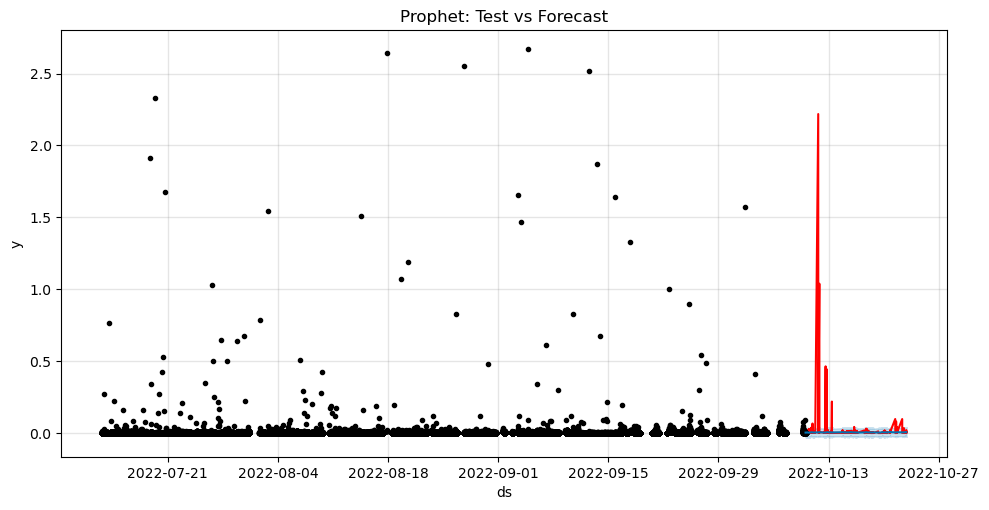

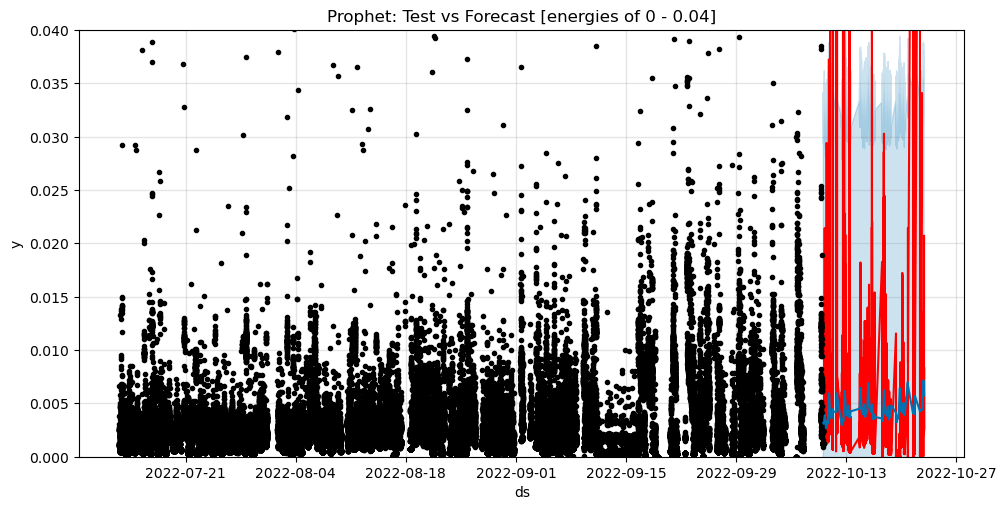

In [84]:
f, ax = plt.subplots(figsize=(10,5))
ax.plot(test['ds'],test['y'],color='r')
fig = prp_model.plot(prp_preds,ax=ax)

plt.title('Prophet: Test vs Forecast')


f, ax = plt.subplots(figsize=(10,5))
ax.plot(test['ds'],test['y'],color='r')
fig = prp_model.plot(prp_preds,ax=ax)

plt.title('Prophet: Test vs Forecast [energies of 0 - 0.04]')
plt.ylim(0,0.04);


In [85]:
pr_rmse = np.sqrt(mean_squared_error(test['y'],prp_preds['yhat']))
pr_mae = mean_absolute_error(test['y'],prp_preds['yhat'])
pr_mape = mean_absolute_percentage_error(test['y'],prp_preds['yhat'])

print(pr_rmse, pr_mae, pr_mape)

0.021236808146616475 0.0030071954340761767 43.580551379595


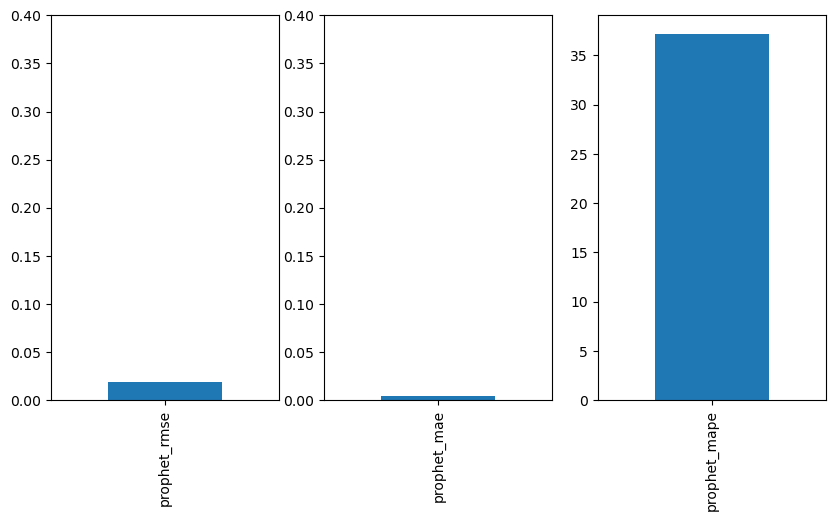

In [55]:
plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
pd.Series([pr_rmse],index=['prophet_rmse']).plot(kind='bar')
plt.ylim(0,0.4)

plt.subplot(1,3,2)
pd.Series([pr_mae],index=['prophet_mae']).plot(kind='bar')
plt.ylim(0,0.4)

plt.subplot(1,3,3)
pd.Series([pr_mape],index=['prophet_mape']).plot(kind='bar');

In [107]:
a = pd.DataFrame({'svr_pred':test_pred1,'prp_pred':np.array(prp_preds['yhat'])})

In [108]:
b = test.reset_index(drop=True)

In [121]:
combined = pd.concat([b,a],axis=1).set_index('ds')
combined.head()

,y,svr_pred,prp_pred
ds,,,
2022-10-10 01:56:15.718100,0.001161,0.079535,0.003170
2022-10-10 01:56:50.786548,0.001159,0.079535,0.003169
2022-10-10 01:57:25.722620,0.001153,0.079535,0.003168
2022-10-10 01:58:35.731246,0.002314,0.079535,0.003165
2022-10-10 01:59:10.801635,0.001142,0.079535,0.003164


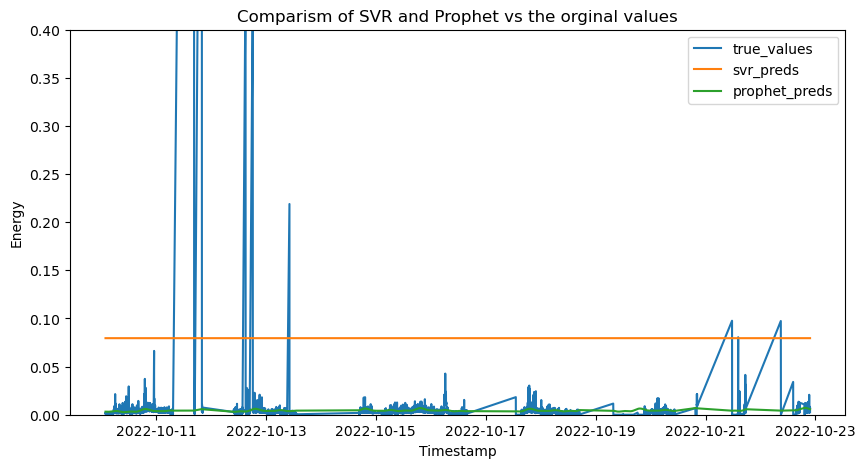

In [125]:
plt.figure(figsize=[10,5])
plt.plot(combined['y'],label='true_values')
plt.plot(combined['svr_pred'], label ='svr_preds')
plt.plot(combined['prp_pred'], label = 'prophet_preds')
plt.ylim(0,0.4)
plt.legend()
plt.title('Comparism of SVR and Prophet vs the orginal values')
plt.xlabel('Timestamp')
plt.ylabel('Energy');

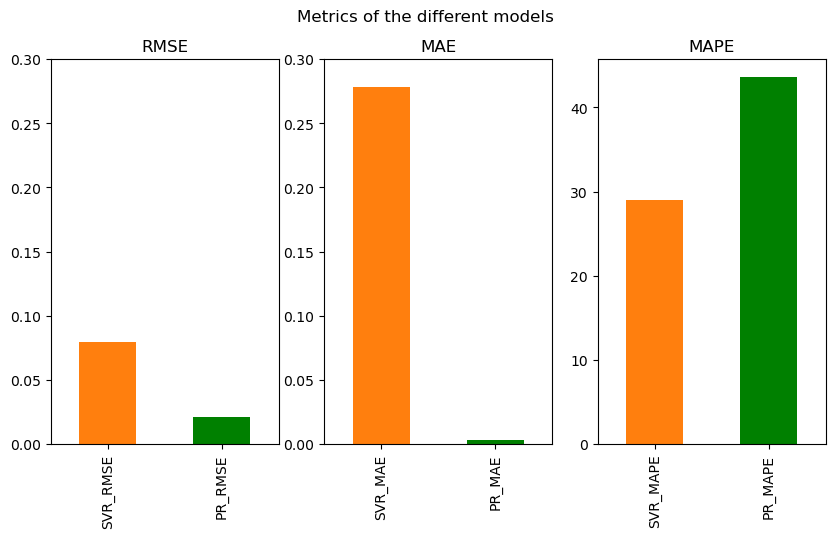

In [162]:
plt.figure(figsize=[10,5])

color = ['#ff7f0e','green']
plt.subplot(1,3,1)
pd.Series([test_rmse1[-1],pr_rmse],index=['SVR_RMSE','PR_RMSE']).plot(kind='bar', color = color)
plt.ylim(0,0.3)
plt.title('RMSE')

plt.subplot(1,3,2)
pd.Series([test_mae1[-1],pr_mae],index=['SVR_MAE','PR_MAE']).plot(kind='bar',color=color)
plt.ylim(0,0.3)
plt.title('MAE')

plt.subplot(1,3,3)
pd.Series([test_mape1[-1],pr_mape],index=['SVR_MAPE','PR_MAPE']).plot(kind='bar', color = color)
plt.suptitle('Metrics of the different models')
plt.title('MAPE');


In [128]:
test_rmse1[-1],test_mae1[-1],test_mape1[-1]

(0.07967266816648852, 0.27812170793572766, 28.997332443630686)

In [129]:
pr_rmse,pr_mae,pr_mape

(0.021236808146616475, 0.0030071954340761767, 43.580551379595)